# **Chapter 3**
This notebook walkthrough the cleaning and exploring process of our arabic tweets dataset

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from IPython.display import display

import utils


FONT_PATH = os.environ.get("FONT_PATH", "/Library/Fonts/Times New Roman.ttf")
path = './labeld_dataset/'

In [2]:
# sys.path.insert(0, path)

In [3]:
bolivard = pd.read_csv(path+'bolivard.csv', header=0)
winter = pd.read_csv(path+'winter_wounder_land.csv', header=None)
shm = pd.read_csv(path+'labeled shm3.csv', header=0)

In [4]:
display(shm.loc[:, shm.columns != 'user-name'].head(n=3))
display(bolivard.head(n=3))
display(winter.head(n=3))

,Unnamed: 0,date,label,tweet,loca,fv_count,rt-count,Event name
0,31,2019-11-06 15:43:30,2.0,ابو ناصر طلبتك ...المفروض تكون ليلة لك كليلة ع...,جدة,0.0,0.0,SHM
1,32,2019-11-06 15:43:07,2.0,ليلة سهم على اي قناه عرضوها امس؟,NaN,0.0,0.0,SHM
2,108,2019-11-06 15:01:00,2.0,#ليلة_سهم\nالليلة بشكل عام جميلة .. بس الكراسي...,الرياض,0.0,0.0,SHM


,date,label,text,event
0,2019-10-19 15:06:03,0,#بوليفارد_الرياض وصار للعوائل فقط😂😂,carnival_bolivard
1,2019-10-19 15:05:17,1,@RiyadhSeason ودنا #بوليفارد_الرياض يكون متواج...,carnival_bolivard
2,2019-10-19 15:02:51,1,أغلبنا تضايق من زحمة #بوليفارد_الرياض والمناظر...,carnival_bolivard


,0,1,2
0,2019-10-26 20:14:04,اللعبة هذي في #ونتر_وندرلاند اليوم\n\nاخيرا ج...,NaN
1,2019-10-26 20:13:28,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,1
2,2019-10-26 20:12:23,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,2


In [5]:
winter.columns = ['date', 'text', 'label']
print(shm.columns)

Index(['Unnamed: 0', 'date', 'label', 'tweet', 'user-name', 'loca', 'fv_count',
       'rt-count', 'Event name'],
      dtype='object')


In [6]:

shm.drop('Unnamed: 0', inplace=True, axis=1)
shm.rename(columns={'tweet': 'text'}, inplace=True)


In [7]:
print(shm.columns)
print(winter.columns)

Index(['date', 'label', 'text', 'user-name', 'loca', 'fv_count', 'rt-count',
       'Event name'],
      dtype='object')
Index(['date', 'text', 'label'], dtype='object')


In [8]:
winter['event'] = 'winter_wonder_land'
shm['event'] = 'shm'
shm.drop('Event name', inplace=True, axis=1)

In [9]:
print(f'Shm event labeld tweets {shm.label.notna().sum()}\nwinter event labeld tweets {winter.label.notna().sum()}\nbolivard event labeld tweets {bolivard.label.notna().sum()}')

Shm event labeld tweets 1548
winter event labeld tweets 1480
bolivard event labeld tweets 2001


In [10]:
shm = shm[shm.label.notna()]

winter = winter[winter.label.notna()]



In [11]:
print(shm.label.value_counts())

print('\n', winter.label.value_counts())

print('\n',bolivard.label.value_counts())

1.0    1387
0.0     128
2.0      33
Name: label, dtype: int64

 1    703
2    490
0    285
       2
Name: label, dtype: int64

 1    1240
0     533
2     228
Name: label, dtype: int64


In [12]:
winter = winter[winter.label != ' ']

In [13]:
shm.label = shm.label.astype('int64')

In [14]:
print(shm.shape)
print(winter.shape)
print(bolivard.shape)

(1548, 8)
(1478, 4)
(2001, 4)


In [15]:
merged = pd.concat([winter, bolivard, shm])

/Users/yasir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
display(merged.head(n=15))
print(merged.shape)

,date,event,fv_count,label,loca,rt-count,text,user-name
1,2019-10-26 20:13:28,winter_wonder_land,NaN,1,NaN,NaN,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,NaN
2,2019-10-26 20:12:23,winter_wonder_land,NaN,2,NaN,NaN,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,NaN
3,2019-10-26 20:09:44,winter_wonder_land,NaN,2,NaN,NaN,حد يعرف سعر الالعاب في ونتر وندر لاند ؟!!\n #م...,NaN
4,2019-10-26 20:08:12,winter_wonder_land,NaN,2,NaN,NaN,@KAldeehani @MQA707 لا صح اسمها ونتر وندرلاند,NaN
6,2019-10-26 20:05:38,winter_wonder_land,NaN,1,NaN,NaN,@Turki_alalshikh اليوم زرت #ونتر_وندرلاند مع ا...,NaN
7,2019-10-26 20:04:07,winter_wonder_land,NaN,2,NaN,NaN,تدرين ليه المطر يشتاق لك يالرياض\nمن بين كل ال...,NaN
8,2019-10-26 20:03:19,winter_wonder_land,NaN,1,NaN,NaN,#موسم_الرياض فيه مطاعم ألعاب نارية النافورة، ا...,NaN
9,2019-10-26 20:00:18,winter_wonder_land,NaN,1,NaN,NaN,سينما على الأجواء المفتوحة وياسلام سلم🌃 \nمن ق...,NaN
10,2019-10-26 19:48:44,winter_wonder_land,NaN,1,NaN,NaN,نصيحتي له لا تشيلو ونتر وندرلاند خلو عندنا وحد...,NaN
11,2019-10-26 19:48:20,winter_wonder_land,NaN,0,NaN,NaN,ماطلبنا شي مستحيل ولا شي باذخ مثل #ونتر_وندرلا...,NaN


(5027, 8)


In [17]:
merged.label  = pd.to_numeric(merged.label)

In [18]:
merged.label.value_counts()

1    3330
0     946
2     751
Name: label, dtype: int64

In [19]:
merged.label = merged['label'].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

In [20]:
frequent_words = utils.frequent_words(merged.text, topk=25)
frequent_words

الرياض        2847
سهم           1646
موسم          1634
ونتر          1407
وندرلاند      1400
ليلة          1378
مسيره          946
بوليفارد       657
ليله           398
اليوم          239
مسيرة          206
اروح           164
رابح           119
الزحمه         110
البوليفارد     103
جميل           101
تركي           100
صار            100
الناس          100
شكرا            99
زحمه            98
احلى            95
الترفيه         95
شكراً           93
اجمل            85
dtype: int64

In [21]:
pos_frequ_words = utils.frequent_words(merged[merged.label == 'Positive'].text, topk=25)
pos_frequ_words

الرياض       1897
سهم          1476
ليلة         1276
موسم         1115
وندرلاند      689
ونتر          689
مسيره         638
ليله          339
بوليفارد      333
اليوم         172
مسيرة         169
رابح          116
اروح          105
شكرا           94
احلى           92
جميل           90
شكراً          89
صار            86
اجمل           82
عبدالمجيد      80
صقر            74
الترفيه        73
تركي           73
جبار           72
ماجد           68
dtype: int64

In [22]:
neg_frequ_words = utils.frequent_words(merged[merged.label == 'Negative'].text, topk=25)
neg_frequ_words

الرياض        585
موسم          381
مسيره         266
ونتر          257
وندرلاند      255
بوليفارد      157
سهم           131
ليلة           77
زحمه           61
الزحمه         52
تنظيم          48
زحمة           47
ليله           45
الزحمة         36
الناس          32
اليوم          31
مسيرة          30
اروح           26
التنظيم        24
البوليفارد     21
الحين          20
الوكيل         19
مكان           19
يارب           19
ونعم           19
dtype: int64

In [23]:
neu_frequ_words = utils.frequent_words(merged[merged.label == 'Neutral'].text, topk=25)
neu_frequ_words

ونتر          461
وندرلاند      456
الرياض        365
بوليفارد      167
موسم          138
مسيره          42
سهم            39
اليوم          36
الزحمه         35
اروح           33
زحمه           30
تذاكر          26
الناس          25
ليلة           25
الزحمة         24
الحين          20
زحمة           19
علي            18
راح            17
الالعاب        17
سباق           16
البوليفارد     15
الهلال         15
ليله           14
وين            13
dtype: int64

In [24]:
combind = ' '.join(frequent_words.index)

In [25]:
data = arabic_reshaper.reshape(combind)
data = get_display(data)
data = data.split()
data.reverse()
print(data)

['ﺽﺎﻳﺮﻟﺍ', 'ﻢﻬﺳ', 'ﻢﺳﻮﻣ', 'ﺮﺘﻧﻭ', 'ﺪﻧﻻﺭﺪﻧﻭ', 'ﺔﻠﻴﻟ', 'ﻩﺮﻴﺴﻣ', 'ﺩﺭﺎﻔﻴﻟﻮﺑ', 'ﻪﻠﻴﻟ', 'ﻡﻮﻴﻟﺍ', 'ﺓﺮﻴﺴﻣ', 'ﺡﻭﺭﺍ', 'ﺢﺑﺍﺭ', 'ﻪﻤﺣﺰﻟﺍ', 'ﺩﺭﺎﻔﻴﻟﻮﺒﻟﺍ', 'ﻞﻴﻤﺟ', 'ﻲﻛﺮﺗ', 'ﺭﺎﺻ', 'ﺱﺎﻨﻟﺍ', 'ﺍﺮﻜﺷ', 'ﻪﻤﺣﺯ', 'ﻰﻠﺣﺍ', 'ﻪﻴﻓﺮﺘﻟﺍ', 'ﺍﺮﻜﺷ', 'ﻞﻤﺟﺍ']


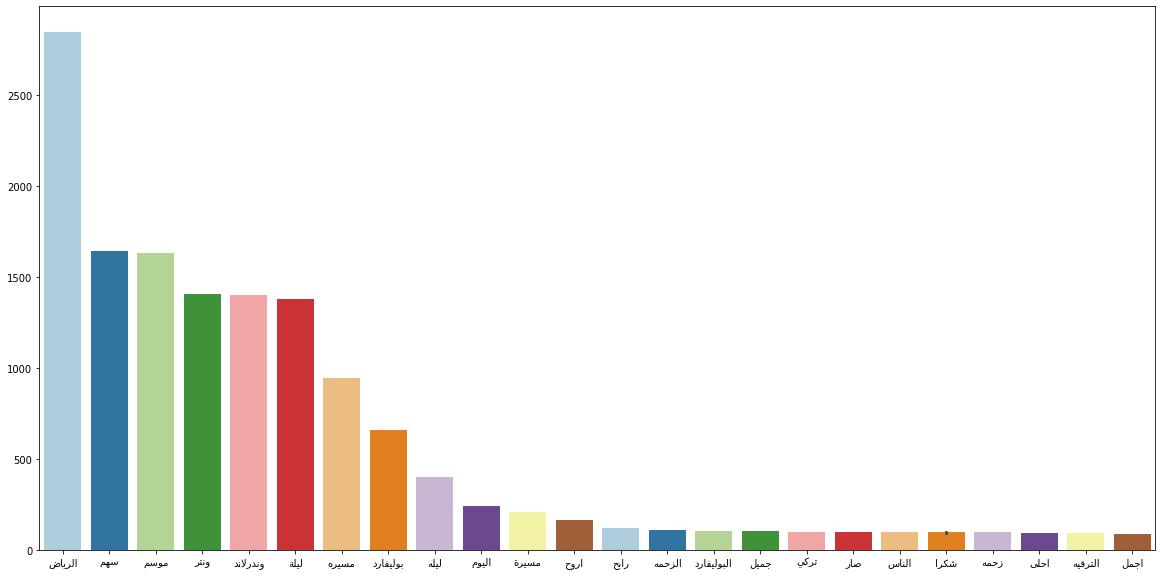

In [26]:
fig , ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data, frequent_words.values, palette="Paired")
plt.show()

In [27]:
pos_emojies = utils.view_emojie(merged[merged.label == 'Positive'].text)
neg_emojies = utils.view_emojie(merged[merged.label == 'Negative'].text)

In [28]:
print(pos_emojies)
print(neg_emojies)

0         
1         
2         
3       🌃😏
4         
        ..
3325      
3326      
3327     😍
3328     💔
3329     💙
Length: 3330, dtype: object
0        
1        
2        
3        
4        
       ..
941      
942      
943      
944    🎼🖤
945      
Length: 946, dtype: object


In [29]:
pos_emojies = pos_emojies.replace(r'^\s*$', np.nan, regex=True) # replace empty space with nan .. 
pos_emojies.dropna(inplace=True)

neg_emojies = neg_emojies.replace(r'^\s*$', np.nan, regex=True) 
neg_emojies.dropna(inplace=True)

In [30]:
display(pos_emojies.value_counts())

display(neg_emojies.value_counts())

❤        117
😍         93
💔         76
💙         66
♥         47
        ... 
🇸🇦❤😍       1
💫🌚♥♥       1
🙏🏻❤        1
😭🖤🖤🖤🖤      1
😘❤         1
Length: 963, dtype: int64

💔      17
😂      14
🙂      10
😷       6
😩       6
       ..
✋🏻😡     1
🥴😩🤮     1
😤🙂      1
😬       1
😬😬      1
Length: 148, dtype: int64

In [31]:
pos_arr = []
neg_arr = []
for pos_row, neg_row in zip(pos_emojies, neg_emojies):
    for p_item, n_item  in zip(pos_row, neg_row):
        pos_arr.append(p_item)
        neg_arr.append(n_item)
     
pos_emojies = pd.Series(pos_arr)  
neg_emojies = pd.Series(neg_arr)      

In [32]:
display(pos_emojies.value_counts()[:10])
# display(pos_emojies.value_counts()[-7:])
pos_emojies.value_counts()[:10].to_csv('postive_emojies.csv', index=True)

😍    66
😭    43
❤    29
💔    24
😂    13
🥺    12
♥    10
💙     9
🔥     8
🏻     6
dtype: int64

/Users/yasir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
display(neg_emojies.value_counts()[:10])
# display(neg_emojies.value_counts()[-7:])
neg_emojies.value_counts()[:10].to_csv('negative_emojies.csv', index=True)

💔    50
😂    30
😭    23
🙂    20
🏻    12
😡    10
😷    10
🤢     9
❤     8
😩     8
dtype: int64

/Users/yasir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
cleaned = utils.get_arabic_words(merged.text, handle_emojies='remove', remove_repeated_char=True)
display(cleaned.head(n=15))

0     اجمل مكان رحت لحين موسم الرياض ونتر وندرلاند ح...
1               يعقلون ذولا ونتر وندرلاند وينتروندرلاند
2     يعرف سعر الالعاب ونتر وندر لاند موسم الرياض ون...
3                                   اسمها ونتر وندرلاند
4     اليوم زرت ونتر وندرلاند العائلة اسعد ايامنا فا...
5     تدرين المطر يشتاق يالرياض الفيافي والقرى والمد...
6     موسم الرياض مطاعم ألعاب نارية النافورة الرعب ح...
7     سينما الأجواء المفتوحة وياسلام سلم قدك الرياض ...
8     نصيحتي تشيلو ونتر وندرلاند خلو وحده نصيحه لترك...
9     ماطلبنا مستحيل باذخ ونتر وندرلاند موسم الرياض ...
10    مالها دخل ونتر وندرلاند الفعاليات الثانيه لموس...
11         موسم الرياض ونتر وندرلاند أحلى الأيام فعليًا
12    جانب تغطية صهيل لفعاليات ونتر وندرلاند بالعاصم...
13    الخطة تكسير شبوك يدخلون غصب موسم الرياض ونتر و...
14    ونتر وندرلاند علموني بالنسبه لالعاب لعبه تذكره...
dtype: object

In [35]:
flagged = utils.repeated_char(merged.text)
flagged = flagged.replace(r'^\s*$', np.nan, regex=True)
flagged[flagged.notna()]

30                تفوووتك
46              ابداااااع
52      ههههههههههههههههه
62              انجاززززز
91            وكوووووووبه
              ...        
4973             اوووووفر
4977               عيبببب
4978               جددددا
5003       خلاااااااااااص
5022          مستحييييييل
Length: 671, dtype: object

In [36]:
# combind = ' '.join(cleaned)

In [37]:
# data = arabic_reshaper.reshape(combind)
# data = get_display(data)

In [38]:
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [39]:
# wordcloud.to_file('word_cloud_black.png')

In [40]:
# plt.figure(figsize = (25, 25)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.tight_layout() 
# plt.show()

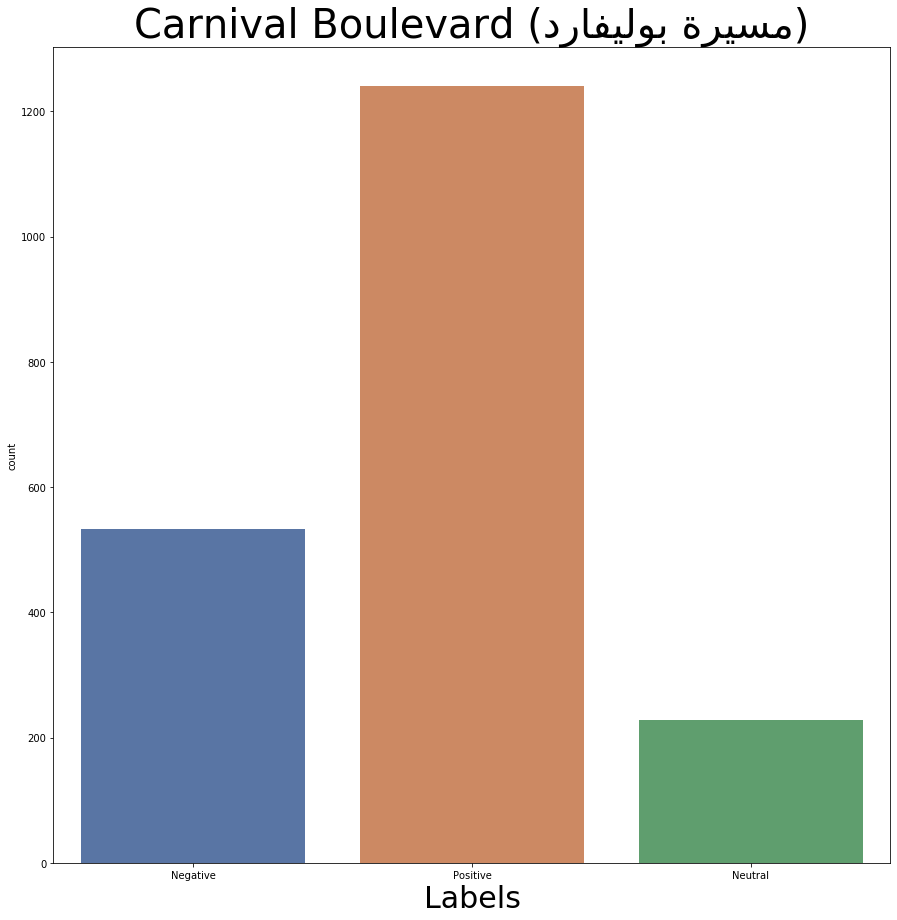

In [41]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.countplot(merged[merged.event=='carnival_bolivard'].label, palette='deep')
event = 'مسيرة بوليفارد'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'Carnival Boulevard ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('carnival_boulevard.png')

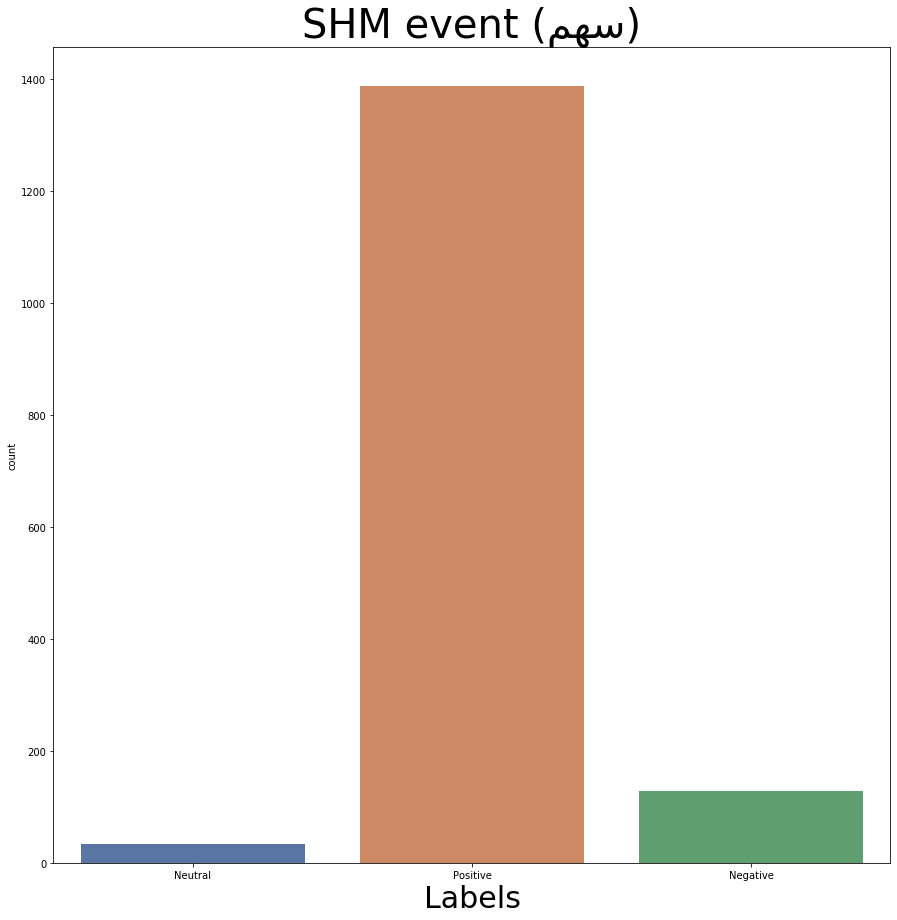

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.countplot(merged[merged.event=='shm'].label, palette='deep')
event = 'سهم'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'SHM event ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('shm.png')

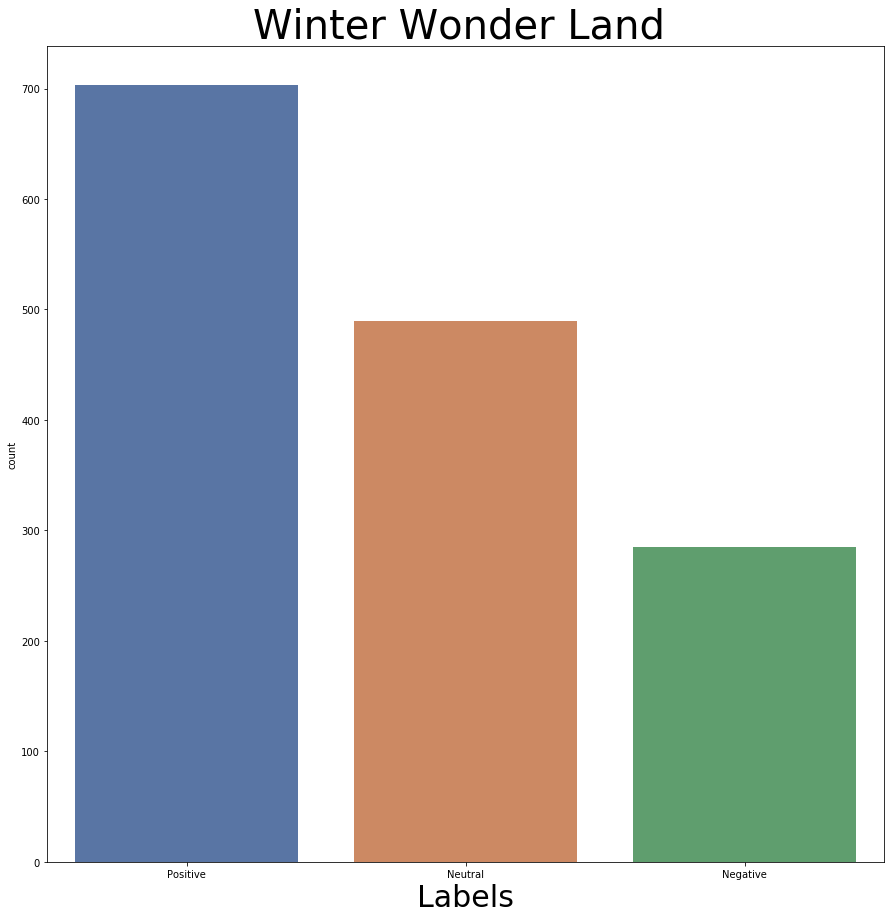

In [43]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.countplot(merged[merged.event=='winter_wonder_land'].label, palette="deep")

plt.title('Winter Wonder Land ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('winter_wonder_land.png')

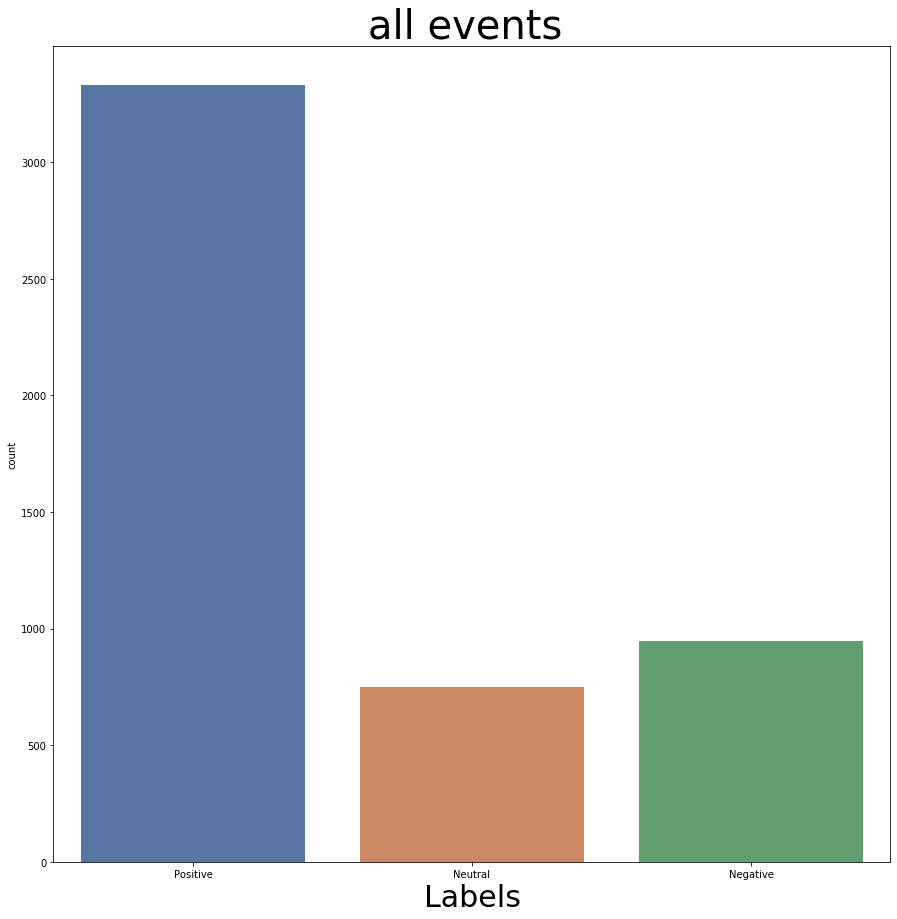

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.countplot(merged.label, palette='deep')
# event = 'سهم'
# event = arabic_reshaper.reshape(event)
# event = get_display(event)
plt.title('all events ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('events.png')

In [45]:
wonder_land = utils.get_arabic_words(winter.text, handle_emojies='remove', remove_repeated_char=False)
wonder_land = ' '.join(wonder_land)

In [46]:
data = arabic_reshaper.reshape(wonder_land)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

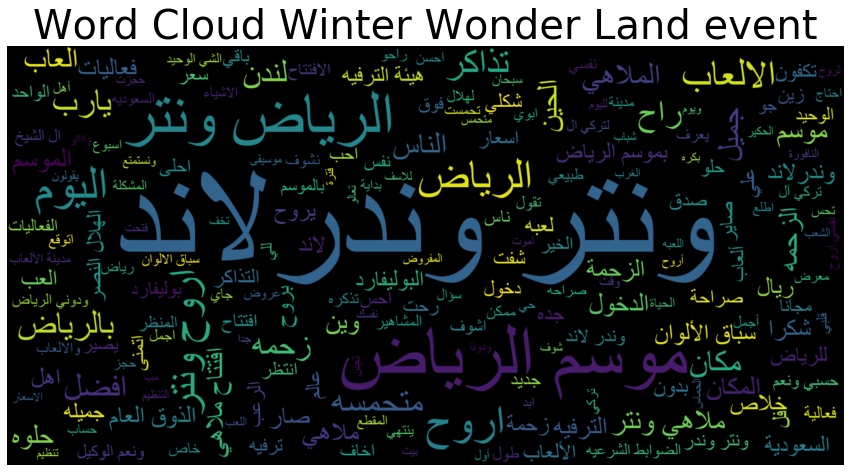

In [47]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title('Word Cloud Winter Wonder Land event', fontsize=40)
plt.axis("off") 
plt.savefig('Word_Cloud_Winter_Wonder_Land.png')
plt.show()


In [48]:
shm_event = utils.get_arabic_words(shm.text, handle_emojies='remove', remove_repeated_char=False)
shm_event = ' '.join(shm_event)

In [49]:
data = arabic_reshaper.reshape(shm_event)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

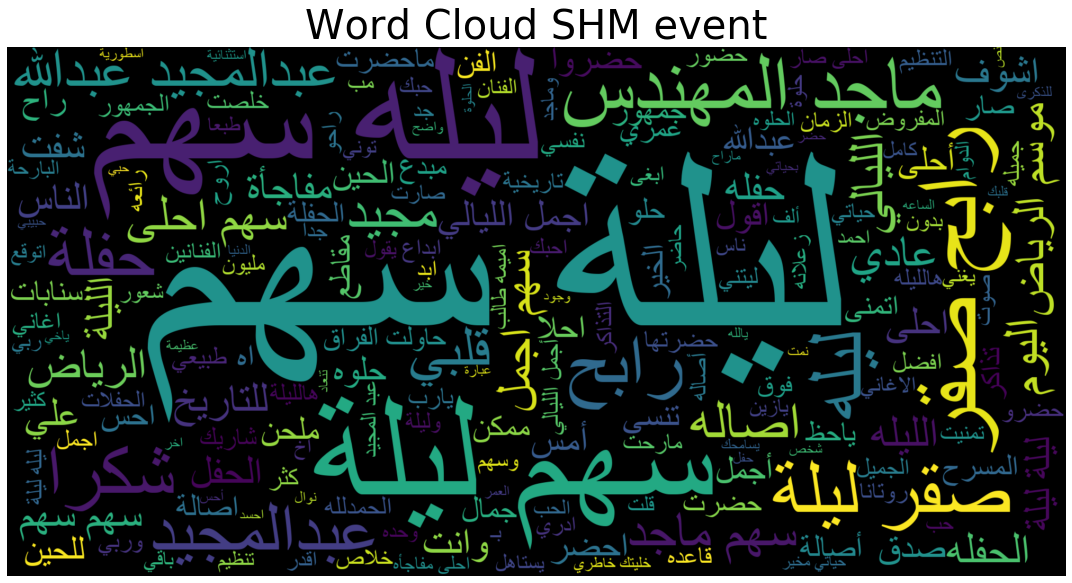

In [50]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.title('Word Cloud SHM event', fontsize=40)
plt.tight_layout() 
plt.savefig('Word_Cloud_SHM_Event.png')
plt.show()

In [51]:
bolivard_event = utils.get_arabic_words(bolivard.text, handle_emojies='remove', remove_repeated_char=False)
bolivard_event = ' '.join(bolivard_event)

In [52]:
data = arabic_reshaper.reshape(bolivard_event)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

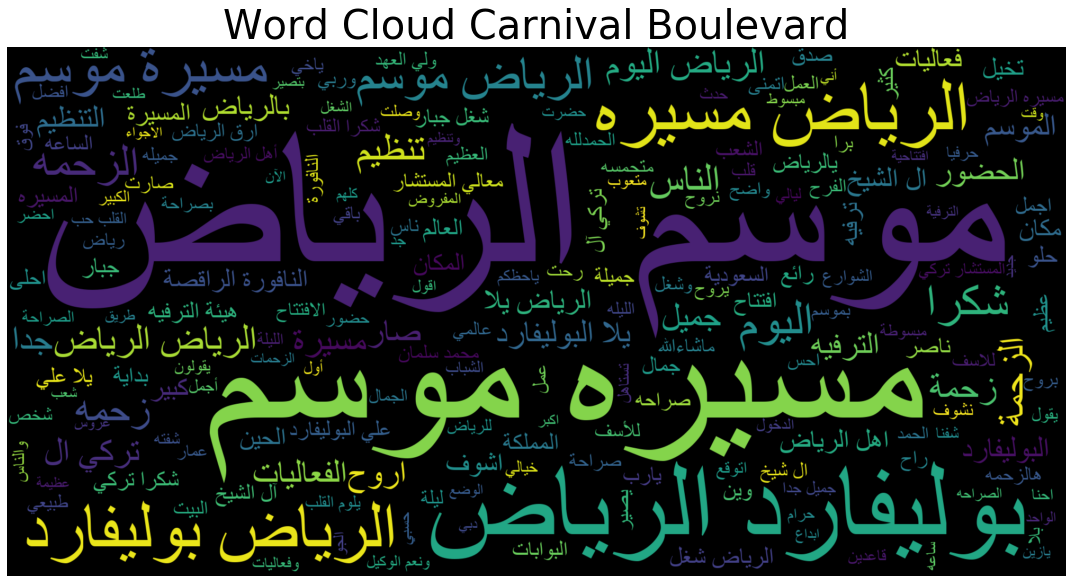

In [53]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.title('Word Cloud Carnival Boulevard', fontsize=40)
plt.tight_layout() 
plt.savefig('Word_Cloud_Carnival_Boulevard.png')
plt.show()